<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Imputation</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.9</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In practical data science, datasets are incomplete or may contain erroneous data. For this reason, a way of handle missing data is a must before a machine learning algorithm is deployed. One way to handle missing data is to either delete multiple observations (samples, which have at least one missing value) or an entire feature (if that feature may contain more than 25-30% of missing values). However, deletion shall be seen as information loss and shall be avoided. Instead, in most cases, it is better to guess the missing data. This kind of process is called imputation. In this lab exercise, different imputation methods are analyzed and compared. 

**Note:** *In this lab exercise, we will use another dataset related to houses prices will be used, contained in the scikit-learn library.*

### Table of contents
1. [Preparation](#Preparation)
2. [Deletion method](#Deletion)
3. [Simple imputation](#Simple)
4. [k-NN imputation](#k-NN)
5. [Linear regression imputation](#Linear)
6. [Summary](#Summary)

## 1. Preparation <a name="Preparation"></a>

Before moving on, as a first step, we import the required libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import os
%matplotlib inline

To have a broader view, let's use another dataset regarding house prices which is part of the scikit-learn library database. 
As a first step, let's read the dataset into a pandas dataframe. Then we may print out the dataframe.

In [2]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing(as_frame=True)
data.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Let's print out the description of the dataset.

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

As can be seen, all the features are numerical. <br>
We may also check the name of the target variable.

In [4]:
data.target_names

['MedHouseVal']

i.e., the target is the median house value in that block. We may also print out the values of the target variable.

In [5]:
data.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Now, let's create our complete dataframe, including the target values.

In [6]:
data.data['MedHouseVal']=data.target
data.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


To decrease the typing effort when creating the statsmodels formula, let's create the following variable containing all the features with the addition symbol in between.

In [7]:
addfeature=list(data.data.columns)
addfeature.remove('MedHouseVal')
addfeature=' + '.join(addfeature)
addfeature

'MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup + Latitude + Longitude'

Let's print out the OLS results, but using mean squared error at this time to not confuse with the RMSE scoring function defined between the original and imputed data (see below).

In [8]:
model = ols(formula = 'MedHouseVal ~ ' + addfeature, data=data.data).fit()
print(model.summary(title="OLS results for the original dataset"))
print("\nMSE =",model.mse_resid)

                     OLS results for the original dataset                     
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:12:53   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.0

As can be seen, there is no statistical evidence that the "Population" input variable has a coefficient different from zero according to the p-value. Let's remove it from the OLS model.

In [9]:
addfeature=list(data.data.columns)
addfeature.remove('Population')
addfeature.remove('MedHouseVal')
addfeature=' + '.join(addfeature)
addfeature
model = ols(formula = 'MedHouseVal ~ ' + addfeature, data=data.data).fit()
print(model.summary(title="OLS results for the original dataset with 'Population' feature removed"))
print("\nMSE =",model.mse_resid)

    OLS results for the original dataset with 'Population' feature removed    
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:12:53   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9175      0.658    -56.085      0.0

The conditioning number is still very high, indicating numerical instability. Let's center the data to see if that would help to solve the numerical instability problem.

In [10]:
features=list(data.data.columns)
features.remove('MedHouseVal')
data_o=data.data[features].apply(lambda x: x-x.mean())
data_o['MedHouseVal']=data.data['MedHouseVal']

Then print out the OLS results:

In [11]:
model = ols(formula = 'MedHouseVal ~ ' + addfeature, data=data_o).fit()
print(model.summary(title="OLS results for the centered dataset with 'Population' feature removed"))
print("\nMSE =",model.mse_resid)

    OLS results for the centered dataset with 'Population' feature removed    
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:12:53   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0686      0.005    410.329      0.0

As can be seen, neither the R-squared value nor the MSE was affected by these changes, so in what follows, we will use the original dataset.

Let's create a copy of the input data and add completely random NaN values to the data. Half of the observation will be affected (i.e., half of the observation will contain one feature or the target with a NaN value). That corresponds to the missing completely at random (MCAR) use case.

In [12]:
Xy=np.array(data.data)
N,D=Xy.shape
miss_rate=0.5
miss_obs_nr=int(N*miss_rate)
mask=np.zeros(N, dtype=bool)
mask[:miss_obs_nr] = True
np.random.shuffle(mask)
miss_feature=np.random.randint(0, D, miss_obs_nr)
Xy_miss=Xy.copy()
Xy_miss[mask, miss_feature] = np.nan

We may check the total number of NaN values in the input data, including the target.

In [13]:
np.sum(np.isnan(Xy_miss))

10320

Let's define the RMSE scoring function to evaluate and compare the different imputation methods. <br>
**Note:** *This shall not be confused with the RMSE value of the OLS.*

In [14]:
def RMSE(Xy_full, Xy_imp,mask):
    N_miss=np.array(mask[0]).sum() # nr of imputed element is the sum of True values in the mask of obs.
    return np.sqrt(np.sum((Xy_full[mask[0],mask[1]]-Xy_imp[mask[0],mask[1]])**2)/N_miss)

## 2. Deletion method <a name="Deletion"></a>

One way to solve the missing value problem is to delete the entire sample (row) from the dataset if at least one missing value is present, either in the input or the output. However, that would result in information loss as half of the dataset would be gone to the garbage in our case.

Let's create a new dataset, where the completely random missing values are discarded, i.e., around half of the dataset is removed.

In [15]:
idx=[]
for i in range(Xy_miss.shape[0]):
    if np.sum(np.isnan(Xy_miss[i,:])):
        idx.append(i)
Xy_del=np.delete(Xy_miss,idx,axis=0)

Let's check whether the new dataset contains NaN values.

In [16]:
np.sum(np.isnan(Xy_del))

0

As can be seen, after deletion, there are no NaN values present in the dataset. Now create the new dataframe:

In [17]:
features=list(data.data.columns)
data_del=pd.DataFrame(data=Xy_del,columns=features)
data_del

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
2,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
3,3.2031,52.0,5.477612,1.079602,910.0,2.263682,37.85,-122.26,2.815
4,3.0750,52.0,5.322650,1.012821,1098.0,2.346154,37.85,-122.26,2.135
...,...,...,...,...,...,...,...,...,...
10315,3.5673,11.0,5.932584,1.134831,1257.0,2.824719,39.29,-121.32,1.120
10316,3.1250,15.0,6.023377,1.080519,1047.0,2.719481,39.26,-121.45,1.156
10317,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
10318,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781


Then print out the OLS results for the half-deleted dataset.

In [18]:
model = ols(formula = 'MedHouseVal ~ ' + addfeature, data=data_del).fit()
print(model.summary(title="OLS results for the half-deleted dataset"))
print("\nMSE =",model.mse_resid)

                   OLS results for the half-deleted dataset                   
Dep. Variable:            MedHouseVal   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2302.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:12:54   Log-Likelihood:                -11175.
No. Observations:               10320   AIC:                         2.237e+04
Df Residuals:                   10312   BIC:                         2.242e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7815      0.916    -41.242      0.0

As can be seen, for this particular dataset, randomly removing half of the observations will not affect the linear regression model as the goodness of fit is only slightly changed. However, this is not the case for other datasets or other types of machine learning algorithms.

## 3. Simple imputation <a name="Simple"></a>

Missing values can be imputed with a provided constant value, like 0, or using the statistics - like mean, median, or most frequent - of each feature in which the missing values are located.

Let's impute the missing values first with a constant value of 0 and then calculate the RMSE scoring function between the original and imputed dataset (i.e., calculate the root mean square error between the two datasets -  the lower the RMSE value, the greater the match between the two datasets). 

In [19]:
rmse_vals=[]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
Xy_impute=simple_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 717.8887660641294


We may also use the mean of each feature/target as the imputation method for missing values (i.e., the average value of a feature to be used to fill the missing value(s) for that feature).

In [20]:
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
Xy_impute=simple_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 519.0136146307217


When outliers are present, the median of each feature/target should be used for the imputation method.

In [21]:
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='median')
Xy_impute=simple_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 529.0446814224471


For categorical features, only the most frequent values can be used as a simple imputation method. That imputation can be also used for numerical features/target, also called simple imputation with mode.

In [22]:
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Xy_impute=simple_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 571.5800218540074


Let's summarize the obtained RMSE score values in a table:

In [23]:
pd.DataFrame(data=np.array(rmse_vals)[np.newaxis],columns=['Constant (zero)','Mean','Median','Most frequent'],index=['RMSE'])

,Constant (zero),Mean,Median,Most frequent
RMSE,717.888766,519.013615,529.044681,571.580022


These RMSE values might be slightly different from the ones presented in the book. That is because of the random nature of the deletion of the values from the original dataset.

## 4. k-NN imputation <a name="k-NN"></a>

The problem with this kind of simple imputation, like mean, median, or mode, is that it does not account for the distribution of the data. It may also affect the existing correlation between the features and the target, which a linear model is based on. Moreover, the problem with the constant imputation is that, for some features, this might not even make sense (for example, setting zero for the average number of rooms for a house price prediction).

Due to the limitation of simple imputation methods described above, another approach, called kNN imputing, can be used for filling missing data. kNN imputing method is based on the k-nearest neighbor's algorithm. In this procedure, first, we locate the observation with at least one missing value. Then we identify the "k" number of most similar observations (neighbors) in the (training) data that are complete (i.e., have no missing values in any column). The similarity of the observations is defined by a distance metric, like Euclidean distance. After computing the distances, the "k" closest observations to the sample in question are identified, and the average value of the predictor of interest is calculated to be used for imputation (weighted average is also possible, where the weights are inversely proportional with the distance). In the case of the scikit-learn library the number of the neighbors, as well as the type of average calculation shall be provided (i.e. 'uniform' when all k neighbors are treated equally, or 'distance' when the weighted average is calculated, where the weights are inversely proportional with the distance).

Let's first set the number of neighbors to a minimum of 3 with uniform wights. <br>
**Note:** *The following code might take a couple of 10 seconds to run.*

In [24]:
rmse_vals=[]
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=3,weights='uniform')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 514.1443652683315


Now, let's increase the number of neighbors to five. The number of neighbors shall be set always to an odd number.

In [25]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=5,weights='uniform')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 498.1538870340367


In general, the more neighbors are taken into account during imputation, the better the obtained results would be. So let's increase the number of neighbors to seven.

In [26]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=7,weights='uniform')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 495.66701333938573


Finally, let's increase the number of neighbors to nine. (Rarely makes sense to go beyond that value.)

In [27]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=9,weights='uniform')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 494.5207850064802


In what follows, we change the imputation to the weighted average. Again, let's start with k=3.

In [28]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=3,weights='distance')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 512.1430162734681


Then increase the number of neighbors to five.

In [29]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=5,weights='distance')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 497.2494610802614


Then, again change the number of neighbors to seven.

In [30]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=7,weights='distance')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 494.4897358596639


Finally, set the number of neighbors to nine.

In [31]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=9,weights='distance')
Xy_impute=knn_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 492.78434259071946


Let's summarize the obtained RMSE scoring values in a table.

In [32]:
pd.DataFrame(data=np.array(rmse_vals).reshape((2,4)),columns=['neighbors=3','neighbors=5','neighbors=7','neighbors=9'],\
             index=['RMSE (uniform weight)','RMSE (distance weight)'])

,neighbors=3,neighbors=5,neighbors=7,neighbors=9
RMSE (uniform weight),514.144365,498.153887,495.667013,494.520785
RMSE (distance weight),512.143016,497.249461,494.489736,492.784343


## 5. Linear regression imputation <a name="Linear"></a>

When one or several predictors without missing values show a strong linear relationship with a predictor that requires imputation, a straightforward linear model may be the best approach. Of course, such an imputation method is appropriate only for non-linear machine learning algorithms discussed in the other two volumes of this book series. 

The scikit-learn library provides an experimental iterative imputation method that can handle several types of estimators, including linear regression. Other regression types, like regression based on k-nearest neighbors or decision tree regression discussed in the second volume of the book series, may also be applied.

In [33]:
from sklearn.linear_model import LinearRegression
rmse_vals=[]
iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=LinearRegression())
Xy_impute=iterative_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 494.24816357082454


Other forms of regression discussed in volume two of the book series may be considered. One is the k-NN regressor. Let's use a k-NN regressor with k=7 and uniform weight.

In [34]:
from sklearn.neighbors import KNeighborsRegressor

iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=KNeighborsRegressor(n_neighbors=7, weights='uniform'))
Xy_impute=iterative_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 474.22239455668006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


We may also try a k-NN regressor with a weighted average.

In [35]:
iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=KNeighborsRegressor(n_neighbors=7, weights='distance'))
Xy_impute=iterative_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 474.95259045315146


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


Finally, let's try the decision tree regressor.

In [36]:
from sklearn.tree import DecisionTreeRegressor

iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=DecisionTreeRegressor())
Xy_impute=iterative_imputer.fit_transform(Xy_miss)
rmse=RMSE(Xy,Xy_impute,[mask, miss_feature])
rmse_vals.append(rmse)
print("RMSE =",rmse)

RMSE = 514.8945162753422


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


Let's summarize the obtained RMSE score values in a table.

In [37]:
pd.DataFrame(data=np.array(rmse_vals)[np.newaxis],columns=['Linear','kNN (uniform)','kNN (weighted)','Decision tree'],\
             index=['RMSE'])

,Linear,kNN (uniform),kNN (weighted),Decision tree
RMSE,494.248164,474.222395,474.95259,514.894516


## 6. Summary <a name="Summary"></a>

Until now, we considered only the RMSE as a scoring value to compare different imputation methods. But we may also use the R-squared and mean squared error of the OLS applied on the imputed dataset.

Let's calculate the goodness of fit of a linear model on the original dataset. We store the goodness of fit values in two lists.

In [38]:
R2=[]
MSE=[]
names=[]
from sklearn.metrics import r2_score, mean_squared_error
X,y=fetch_california_housing(return_X_y=True)
linregr=LinearRegression()
linregr.fit(X,y)
R2_val=r2_score(y,linregr.predict(X))
MSE_val=mean_squared_error(y,linregr.predict(X))
print("R2 = %1.3f"%(R2_val))
print("MSE = %1.3f"%(MSE_val))
R2.append(R2_val)
MSE.append(MSE_val)
names.append('Original data')

R2 = 0.606
MSE = 0.524


Again, remove feature values completely at random from half of the observations. Because we will use the pipeline at this time, the target values are not removed.

In [39]:
N,D=X.shape
miss_rate=0.5
miss_obs_nr=int(N*miss_rate)
mask=np.zeros(N, dtype=bool)
mask[:miss_obs_nr] = True
np.random.shuffle(mask)
miss_feature=np.random.randint(0, D, miss_obs_nr)
X_miss=X.copy()
X_miss[mask, miss_feature] = np.nan

Let's compute the R-squared and MSE values of the OLS on the dataset using a constant value of 0 for imputation.

In [40]:
from sklearn.pipeline import Pipeline
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
pipe=Pipeline(steps=[('preproc',simple_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('Simple imputer (constant)')

R2 = 0.380
MSE = 0.825


Let's compute the R-squared and MSE values of the OLS on the dataset using the mean value for imputation.

In [41]:
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
pipe=Pipeline(steps=[('preproc',simple_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('Simple imputer (mean)')

R2 = 0.529
MSE = 0.627


Let's compute the R-squared and MSE values of the OLS on the dataset using the median value for imputation.

In [42]:
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='median')
pipe=Pipeline(steps=[('preproc',simple_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('Simple imputer (median)')

R2 = 0.519
MSE = 0.640


Let's compute the R-squared and MSE values of the OLS on the dataset using the mode value for imputation.

In [43]:
simple_imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
pipe=Pipeline(steps=[('preproc',simple_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('Simple imputer (mode)')

R2 = 0.284
MSE = 0.953


Let's compute the R-squared and MSE values of the OLS on the dataset using the kNN imputation with uniform weight.

In [44]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=7,weights='uniform')
pipe=Pipeline(steps=[('preproc',knn_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
yhat=pipe.predict(X_miss)
print("R2 = %1.3f"%(r2_score(y,yhat)))
print("MSE = %1.3f"%(mean_squared_error(y,yhat)))
R2.append(r2_score(y,yhat))
MSE.append(mean_squared_error(y,yhat))
names.append('kNN imputer (uniform)')

R2 = 0.584
MSE = 0.554


Let's compute the R-squared and MSE values of the OLS on the dataset using the kNN imputation with a weighted average.

In [45]:
knn_imputer=KNNImputer(missing_values=np.nan, n_neighbors=7,weights='distance')
pipe=Pipeline(steps=[('preproc',knn_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
yhat=pipe.predict(X_miss)
print("R2 = %1.3f"%(r2_score(y,yhat)))
print("MSE = %1.3f"%(mean_squared_error(y,yhat)))
R2.append(r2_score(y,yhat))
MSE.append(mean_squared_error(y,yhat))
names.append('kNN imputer (weighted)')

R2 = 0.585
MSE = 0.552


Let's compute the R-squared and MSE values of the OLS on the dataset using the linear regressor imputation method.

In [46]:
iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=LinearRegression())
pipe=Pipeline(steps=[('preproc',iterative_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('Linear regressor')

R2 = 0.586
MSE = 0.551


Let's compute the R-squared and MSE values of the OLS on the dataset using the kNN regressor imputation method (uniform weight).

In [47]:
iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=KNeighborsRegressor(n_neighbors=7, weights='uniform'))
pipe=Pipeline(steps=[('preproc',iterative_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('kNN regressor (uniform)')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


R2 = 0.544
MSE = 0.607


Let's compute the R-squared and MSE values of the OLS on the dataset using the kNN regressor imputation method (weighted average).

In [48]:
iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=KNeighborsRegressor(n_neighbors=7, weights='distance'))
pipe=Pipeline(steps=[('preproc',iterative_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('kNN regressor (weighted)')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


R2 = 0.548
MSE = 0.602


Let's compute the R-squared and MSE values of the OLS on the dataset using the decision tree regressor imputation method.

In [49]:
iterative_imputer=IterativeImputer(missing_values=np.nan, estimator=DecisionTreeRegressor())
pipe=Pipeline(steps=[('preproc',iterative_imputer),('regr',linregr)])
pipe.fit(X_miss,y)
print("R2 = %1.3f"%(r2_score(y,pipe.predict(X_miss))))
print("MSE = %1.3f"%(mean_squared_error(y,pipe.predict(X_miss))))
R2.append(r2_score(y,linregr.predict(X)))
MSE.append(mean_squared_error(y,linregr.predict(X)))
names.append('Decision tree regressor')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


R2 = 0.591
MSE = 0.544


Let's summarize the obtained R-square and MSE values in a table.

In [50]:
table=pd.DataFrame(data=[R2,MSE],columns=names,index=['R2','MSE'])
table

,Original data,Simple imputer (constant),Simple imputer (mean),Simple imputer (median),Simple imputer (mode),kNN imputer (uniform),kNN imputer (weighted),Linear regressor,kNN regressor (uniform),kNN regressor (weighted),Decision tree regressor
R2,0.606233,0.477813,0.587068,0.579329,0.411745,0.584092,0.58540,0.606064,0.598484,0.599587,0.606010
MSE,0.524321,0.695318,0.549840,0.560145,0.783291,0.553802,0.55206,0.524545,0.534638,0.533170,0.524618


We may also create a bar chart for presenting the results.

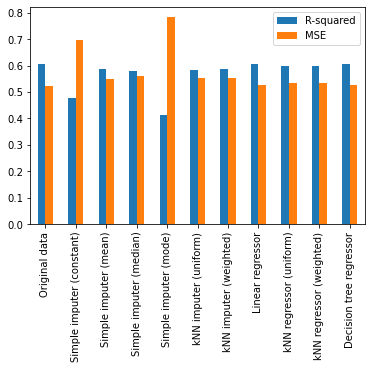

In [51]:
table=pd.DataFrame(data=np.array([R2,MSE]).T,columns=['R-squared','MSE'],index=names)
table.plot.bar()
plt.show()

As can be seen, the simpler imputer with mean and median, respective the imputer with linear, kNN and decision tree regressor provides a very similar result, as obtained with the original data. The simple imputer with a constant value of 0 is the worst. For some random deletion, the simple regressor with the mode is also not performing well. 

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).